In [54]:
import pandas as pd
import re
import html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import joblib

In [40]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [41]:
df.shape

(22000, 2)

In [42]:
df.isnull().sum()

,0
Text,0
language,0


In [43]:
df.value_counts("language")

,count
language,
Arabic,1000
Chinese,1000
Dutch,1000
English,1000
Estonian,1000
French,1000
Hindi,1000
Indonesian,1000
Japanese,1000


In [44]:
df["Text"].sample(10,random_state=42)

,Text
13035,武器システムにおいては、上述の通り、アスロック対潜ミサイルのmk gmls（mk 連装発射機...
3115,в апреле года ломоносов за дерзкое поведение ...
8732,bagnizeau est commune francicum incolarum ann...
7591,قاسم اباد د ننگرهار ولایت د بهسودو ولسوالۍ له ...
221,सार्क कॉन्सोर्टियम ऑन ओपन एंड डिस्टेंस लर्निंग...
17295,relatório da repartição dos negócios da fazend...
5857,كان مستغرباً أن يتحدث مراد بك بهذه الثقة الزائ...
12608,وسعت عرصهٔ شهری کرمانشاه برابر با ٫ کیلومتر مر...
3463,भारत में दशमलव प्रणाली हड़प्पाकाल में अस्तित्व...
6478,авто́бусный переу́лок — переулок в городе влад...


In [45]:
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # 1. HTML entity temizle ve Unicode normalize et
    text = html.unescape(text)

    # 2. URL, e-posta ve mention/hashtag gibi gürültülü ama dil dışı yapıları temizle
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URL
    text = re.sub(r"\S+@\S+", "", text)                  # E-posta
    text = re.sub(r"@\w+|#\w+", "", text)                # @mention ve #hashtag

    # 3. Unicode kontrol karakterlerini ve fazla boşlukları kaldır
    text = re.sub(r"[\r\n\t\u200b\u200c\u200d]", " ", text)  # görünmeyen karakterleri temizle
    text = re.sub(r"\s+", " ", text).strip()  # fazla boşlukları azalt

    return text

df["Text"] = df["Text"].apply(clean_text)

In [46]:
df["Text"].sample(10,random_state=42)

,Text
13035,武器システムにおいては、上述の通り、アスロック対潜ミサイルのmk gmls（mk 連装発射機...
3115,в апреле года ломоносов за дерзкое поведение п...
8732,bagnizeau est commune francicum incolarum anno...
7591,قاسم اباد د ننگرهار ولایت د بهسودو ولسوالۍ له ...
221,सार्क कॉन्सोर्टियम ऑन ओपन एंड डिस्टेंस लर्निंग...
17295,relatório da repartição dos negócios da fazend...
5857,كان مستغرباً أن يتحدث مراد بك بهذه الثقة الزائ...
12608,وسعت عرصهٔ شهری کرمانشاه برابر با ٫ کیلومتر مر...
3463,भारत में दशमलव प्रणाली हड़प्पाकाल में अस्तित्व...
6478,авто́бусный переу́лок — переулок в городе влад...


In [47]:
df = df.dropna()
df.isnull().sum()

,0
Text,0
language,0


In [48]:
vectorizer = TfidfVectorizer(analyzer='char')
X = vectorizer.fit_transform(df['Text'])
y= df["language"]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.15)

In [50]:
models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "GradBoost": GradientBoostingClassifier(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average='macro'),
        "Recall": recall_score(y_test, preds, average='macro'),
        "F1": f1_score(y_test, preds, average='macro')
    })

results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1
3,RandomForest,0.974848,0.977267,0.975452,0.975877
5,GradBoost,0.970606,0.972517,0.971490,0.971655
0,LogReg,0.967576,0.970124,0.968405,0.968777
1,KNN,0.967273,0.970674,0.967867,0.968512
6,MultinomialNB,0.943333,0.960511,0.947365,0.947871
2,DecisionTree,0.936364,0.937878,0.938206,0.937885
7,BernoulliNB,0.927879,0.936696,0.930893,0.931986
4,AdaBoost,0.638182,0.698750,0.647587,0.633032


In [51]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

In [52]:
best_model.fit(x_train, y_train)
preds = best_model.predict(x_test)

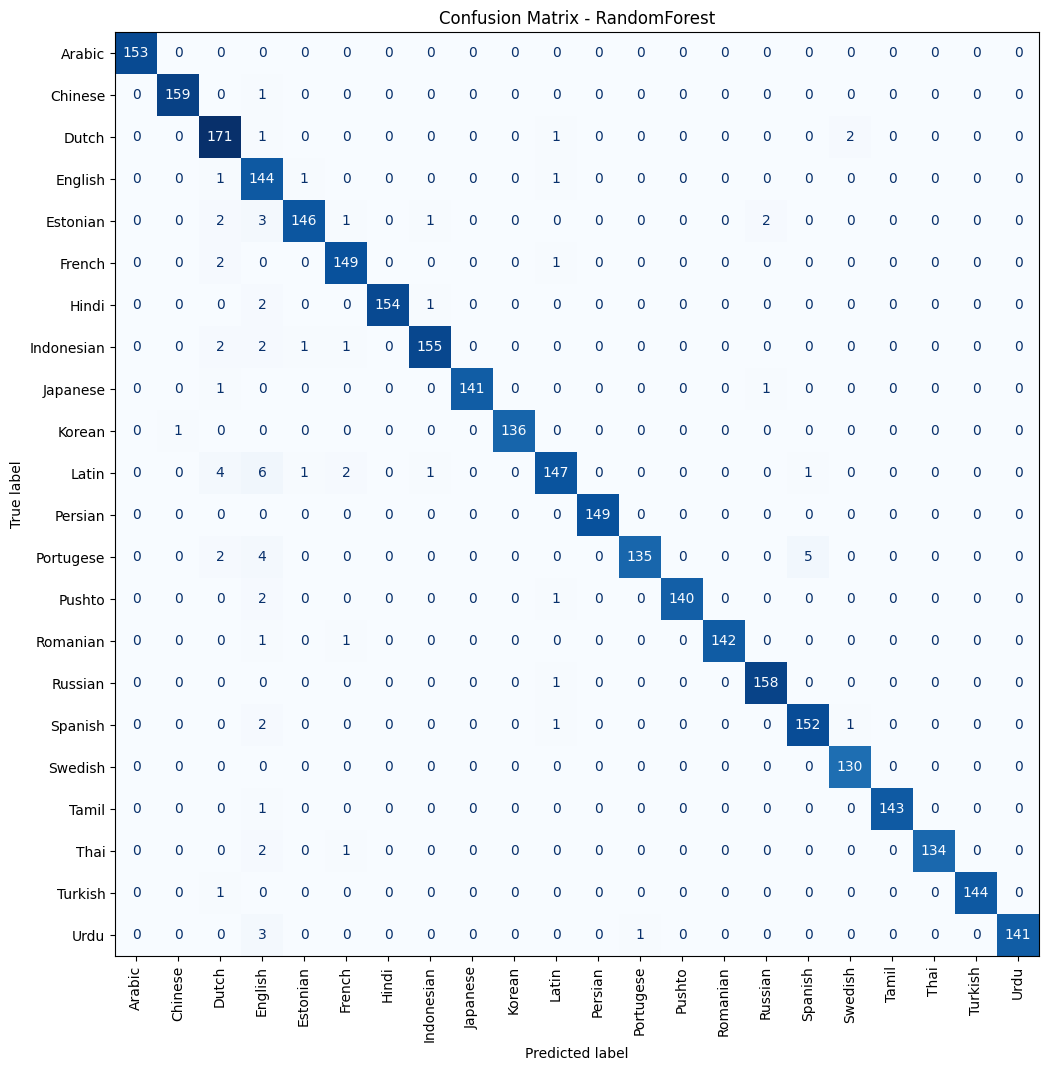

In [55]:
cm = confusion_matrix(y_test, preds, labels=best_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues", colorbar=False)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [ ]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='char', ngram_range=(1, 5))),
    ('model', RandomForestClassifier())
])

pipeline.fit(df['Text'], df['language'])

In [ ]:
joblib.dump(pipeline, "language_pipeline.pkl")